# Library Import

In [1]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import gensim
import gensim.corpora as corpora
from gensim import corpora, models
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re
import pyLDAvis
import pyLDAvis.gensim

# Data Cleaning and Pre-Processing

In [55]:
print(stopwords.words())

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

In [3]:
df = pd.read_csv('RA TestData 2.csv')

In [4]:
df.head(10)

,chat_id,question_translated,text_response
0,1000,What is NCF?,The National ECCE Curriculum Framework is a do...
1,1014,The girl has diarrhoea,Here is a resource link for a video in Hindi t...
2,1021,My child has a fever. What do I do?,"If your child has a fever, it is important to ..."
3,1022,Yes it is,"As an AI language model, my policy is to provi..."
4,1023,My child has a fever. What do I do?,"If your child has a fever, it is important to ..."
5,1024,When do children usually learn to walk?,Children typically learn how to walk between 9...
6,1025,What should I keep in mind when teething my ch...,"I'm sorry, but the given context does not prov..."
7,1026,Hamara Gaon Poster to Involve Sections of the ...,"As an AI language model, I do not have access ..."
8,1032,What is Bal Shiksha?,Bal Shiksha is a Hindi term that translates to...
9,1033,How to help a child in education?,There are many ways to assist a child in educa...


In [5]:
df.shape

(927, 3)

In [6]:
df.describe

<bound method NDFrame.describe of      chat_id                                question_translated  \
0       1000                                       What is NCF?   
1       1014                             The girl has diarrhoea   
2       1021                My child has a fever. What do I do?   
3       1022                                          Yes it is   
4       1023                My child has a fever. What do I do?   
..       ...                                                ...   
922      988                                       What is NCF?   
923      989                                  Raw Pea Paragraph   
924      991  what is the national curriculum framework for ece   
925      993                                                  T   
926      999  what is the national curriculum framework for ece   

                                         text_response  
0    The National ECCE Curriculum Framework is a do...  
1    Here is a resource link for a video in Hin

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   chat_id              927 non-null    int64 
 1   question_translated  927 non-null    object
 2   text_response        927 non-null    object
dtypes: int64(1), object(2)
memory usage: 21.9+ KB


In [8]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', 'URL', text) 
    text = ''.join(letter for letter in text if letter not in ["?","."])
    text = re.sub(r'\d+', '', text)
    text = ' '.join([word for word in text.split() if word.isalnum()])
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

def remove_whitespace(text):
    text = text.strip()
    if text: 
        return text
    else:
        return None 

In [9]:
df['question_treated'] = df['question_translated'].apply(preprocess_text)

In [10]:
pd.set_option('display.max_rows', None)
df[['question_translated','question_treated']].head(10)

,question_translated,question_treated
0,What is NCF?,ncf
1,The girl has diarrhoea,girl diarrhoea
2,My child has a fever. What do I do?,child fever
3,Yes it is,yes
4,My child has a fever. What do I do?,child fever
5,When do children usually learn to walk?,children usually learn walk
6,What should I keep in mind when teething my ch...,keep mind teething child
7,Hamara Gaon Poster to Involve Sections of the ...,hamara gaon poster involve sections society
8,What is Bal Shiksha?,bal shiksha
9,How to help a child in education?,help child education


In [11]:
df['question_treated'].isnull().sum()

0

In [12]:
df['question_treated'] = df['question_treated'].apply(remove_whitespace)

In [13]:
df['question_treated'].isnull().sum()

35

In [14]:
df.dropna(subset=['question_treated'], inplace=True)

In [15]:
df['question_treated'].isnull().sum()

0

In [16]:
question = ' '.join(df['question_treated']).split()

In [56]:
question

['ncf',
 'girl',
 'diarrhoea',
 'child',
 'fever',
 'yes',
 'child',
 'fever',
 'children',
 'usually',
 'learn',
 'walk',
 'keep',
 'mind',
 'teething',
 'child',
 'hamara',
 'gaon',
 'poster',
 'involve',
 'sections',
 'society',
 'bal',
 'shiksha',
 'help',
 'child',
 'education',
 'involvement',
 'uneducated',
 'mother',
 'child',
 'education',
 'motivate',
 'parents',
 'educate',
 'child',
 'balsakhi',
 'balsakhi',
 'matao',
 'ki',
 'bhumika',
 'dast',
 'ke',
 'dauran',
 'bacchon',
 'ka',
 'khayal',
 'kaise',
 'rakhte',
 'hain',
 'early',
 'childhood',
 'education',
 'capital',
 'kerala',
 'national',
 'curriculum',
 'framework',
 'ece',
 'early',
 'childhood',
 'education',
 'child',
 'obese',
 'early',
 'childhood',
 'education',
 'early',
 'childhood',
 'education',
 'ece',
 'early',
 'childhood',
 'education',
 'early',
 'childhood',
 'education',
 'developmental',
 'milestones',
 'children',
 'early',
 'childhood',
 'education',
 'motor',
 'skills',
 'age',
 'child',
 'start'

# Word Cloud for Treated Question

C:\Users\Lenovo\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\Lenovo\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\Lenovo\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\Lenovo\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\Lenovo\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarni

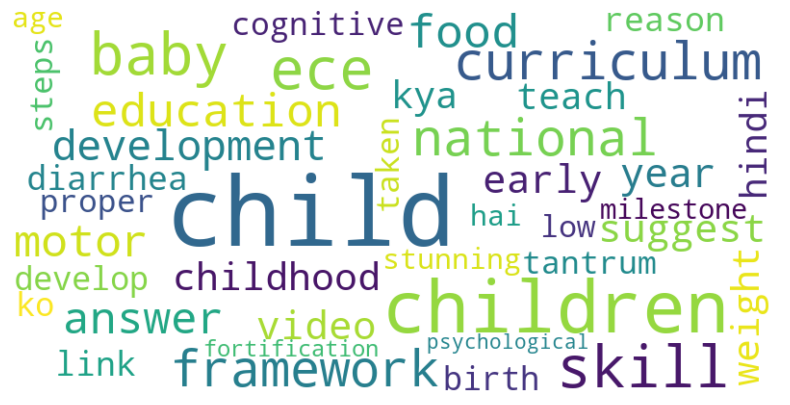

In [18]:
wordcloud = WordCloud(width=800, height=400, max_font_size=100, max_words=40, collocations=False, background_color='white').generate(' '.join(question))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Developing Model

### Using LDA2vec ( Latent Dirichlet Allocation to Vector )

In [19]:
#Tokenizing the pre-processed question column
df['question_tokenized'] = df['question_treated'].str.split(' ')
df['question_tokenized'].head(10)

0                                                [ncf]
1                                    [girl, diarrhoea]
2                                       [child, fever]
3                                                [yes]
4                                       [child, fever]
5                     [children, usually, learn, walk]
6                        [keep, mind, teething, child]
7    [hamara, gaon, poster, involve, sections, soci...
8                                       [bal, shiksha]
9                             [help, child, education]
Name: question_tokenized, dtype: object

In [20]:
#Creating Dictionary and Corpus
id2word = Dictionary(df['question_tokenized'])
corpus = [id2word.doc2bow(text) for text in df['question_tokenized']]
print(corpus[:1])

[[(0, 1)]]


In [21]:
corpus[:15]

[[(0, 1)],
 [(1, 1), (2, 1)],
 [(3, 1), (4, 1)],
 [(5, 1)],
 [(3, 1), (4, 1)],
 [(6, 1), (7, 1), (8, 1), (9, 1)],
 [(3, 1), (10, 1), (11, 1), (12, 1)],
 [(13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)],
 [(19, 1), (20, 1)],
 [(3, 1), (21, 1), (22, 1)],
 [(3, 1), (21, 1), (23, 1), (24, 1), (25, 1)],
 [(3, 1), (26, 1), (27, 1), (28, 1)],
 [(29, 1)],
 [(29, 1), (30, 1), (31, 1), (32, 1)],
 [(33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1)]]

In [22]:
[[(id2word[i], freq) for i, freq in doc] for doc in corpus[:15]]

[[('ncf', 1)],
 [('diarrhoea', 1), ('girl', 1)],
 [('child', 1), ('fever', 1)],
 [('yes', 1)],
 [('child', 1), ('fever', 1)],
 [('children', 1), ('learn', 1), ('usually', 1), ('walk', 1)],
 [('child', 1), ('keep', 1), ('mind', 1), ('teething', 1)],
 [('gaon', 1),
  ('hamara', 1),
  ('involve', 1),
  ('poster', 1),
  ('sections', 1),
  ('society', 1)],
 [('bal', 1), ('shiksha', 1)],
 [('child', 1), ('education', 1), ('help', 1)],
 [('child', 1),
  ('education', 1),
  ('involvement', 1),
  ('mother', 1),
  ('uneducated', 1)],
 [('child', 1), ('educate', 1), ('motivate', 1), ('parents', 1)],
 [('balsakhi', 1)],
 [('balsakhi', 1), ('bhumika', 1), ('ki', 1), ('matao', 1)],
 [('bacchon', 1),
  ('dast', 1),
  ('dauran', 1),
  ('hain', 1),
  ('ka', 1),
  ('kaise', 1),
  ('ke', 1),
  ('khayal', 1),
  ('rakhte', 1)]]

In [23]:
# Build LDA model
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=5, 
                   random_state=10,
                   update_every=1,
                   chunksize=200,
                   alpha='auto',
                   per_word_topics=True,)

In [24]:
topics = lda_model.print_topics()

In [25]:
topics

[(0,
  '0.045*"teach" + 0.044*"food" + 0.042*"kya" + 0.035*"children" + 0.029*"baby" + 0.028*"development" + 0.022*"child" + 0.022*"hai" + 0.021*"tell" + 0.021*"text"'),
 (1,
  '0.168*"child" + 0.061*"children" + 0.032*"years" + 0.026*"language" + 0.025*"develop" + 0.020*"suggest" + 0.019*"age" + 0.019*"malnourished" + 0.019*"skills" + 0.018*"videos"'),
 (2,
  '0.078*"ece" + 0.068*"national" + 0.068*"curriculum" + 0.068*"framework" + 0.030*"weight" + 0.030*"children" + 0.029*"ko" + 0.020*"bacche" + 0.020*"stunning" + 0.018*"birth"'),
 (3,
  '0.045*"skills" + 0.036*"motor" + 0.031*"children" + 0.024*"ke" + 0.024*"baby" + 0.022*"video" + 0.021*"learn" + 0.019*"disruptive" + 0.019*"cognitive" + 0.017*"crying"'),
 (4,
  '0.054*"education" + 0.043*"activities" + 0.042*"early" + 0.041*"childhood" + 0.041*"child" + 0.028*"answer" + 0.016*"important" + 0.016*"se" + 0.015*"get" + 0.014*"hindi"')]

In [26]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.045*"teach" + 0.044*"food" + 0.042*"kya" + 0.035*"children" + '
  '0.029*"baby" + 0.028*"development" + 0.022*"child" + 0.022*"hai" + '
  '0.021*"tell" + 0.021*"text"'),
 (1,
  '0.168*"child" + 0.061*"children" + 0.032*"years" + 0.026*"language" + '
  '0.025*"develop" + 0.020*"suggest" + 0.019*"age" + 0.019*"malnourished" + '
  '0.019*"skills" + 0.018*"videos"'),
 (2,
  '0.078*"ece" + 0.068*"national" + 0.068*"curriculum" + 0.068*"framework" + '
  '0.030*"weight" + 0.030*"children" + 0.029*"ko" + 0.020*"bacche" + '
  '0.020*"stunning" + 0.018*"birth"'),
 (3,
  '0.045*"skills" + 0.036*"motor" + 0.031*"children" + 0.024*"ke" + '
  '0.024*"baby" + 0.022*"video" + 0.021*"learn" + 0.019*"disruptive" + '
  '0.019*"cognitive" + 0.017*"crying"'),
 (4,
  '0.054*"education" + 0.043*"activities" + 0.042*"early" + 0.041*"childhood" '
  '+ 0.041*"child" + 0.028*"answer" + 0.016*"important" + 0.016*"se" + '
  '0.015*"get" + 0.014*"hindi"')]


# Coherence Score

In [27]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['question_tokenized'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6342565171493334


In [28]:
topics_user_engage = ['1 : Child Health Concers', '2 : Learning Concern', '3 : Gov. Schemes Info.', '4 : Skill Development', '5 : General Knowledge']

In [29]:
for topic_id, topic in topics:
    print(topics_user_engage[topic_id])
    print(topic)

1 : Child Health Concers
0.045*"teach" + 0.044*"food" + 0.042*"kya" + 0.035*"children" + 0.029*"baby" + 0.028*"development" + 0.022*"child" + 0.022*"hai" + 0.021*"tell" + 0.021*"text"
2 : Learning Concern
0.168*"child" + 0.061*"children" + 0.032*"years" + 0.026*"language" + 0.025*"develop" + 0.020*"suggest" + 0.019*"age" + 0.019*"malnourished" + 0.019*"skills" + 0.018*"videos"
3 : Gov. Schemes Info.
0.078*"ece" + 0.068*"national" + 0.068*"curriculum" + 0.068*"framework" + 0.030*"weight" + 0.030*"children" + 0.029*"ko" + 0.020*"bacche" + 0.020*"stunning" + 0.018*"birth"
4 : Skill Development
0.045*"skills" + 0.036*"motor" + 0.031*"children" + 0.024*"ke" + 0.024*"baby" + 0.022*"video" + 0.021*"learn" + 0.019*"disruptive" + 0.019*"cognitive" + 0.017*"crying"
5 : General Knowledge
0.054*"education" + 0.043*"activities" + 0.042*"early" + 0.041*"childhood" + 0.041*"child" + 0.028*"answer" + 0.016*"important" + 0.016*"se" + 0.015*"get" + 0.014*"hindi"


In [30]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics = False)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.018810  0.186831       1        1  20.879676
1     -0.075532  0.044268       2        1  19.181122
2      0.263026 -0.068257       3        1  23.513497
3     -0.098005  0.014289       4        1  18.230250
4     -0.108299 -0.177131       5        1  18.195455, topic_info=              Term        Freq       Total Category  logprob  loglift
3            child  148.000000  148.000000  Default  30.0000  30.0000
47             ece   56.000000   56.000000  Default  29.0000  29.0000
48       framework   49.000000   49.000000  Default  28.0000  28.0000
49        national   50.000000   50.000000  Default  27.0000  27.0000
46      curriculum   50.000000   50.000000  Default  26.0000  26.0000
21       education   31.000000   31.000000  Default  25.0000  25.0000
175          teach   29.000000   29.000000  Default  24.0000  24.0000
158            kya   27.000000   27.000000  Default  23.0000  23.0000
230     activities   24.000000   24.000000  Default  22.0000  22.0000
43           early   24.000000   24.000000  Default  21.0000  21.0000
42       childhood   23.000000   23.000000  Default  20.0000  20.0000
66            food   37.000000   37.000000  Default  19.0000  19.0000
54          skills   37.000000   37.000000  Default  18.0000  18.0000
53           motor   21.000000   21.000000  Default  17.0000  17.0000
65          weight   23.000000   23.000000  Default  16.0000  16.0000
210             ko   21.000000   21.000000  Default  15.0000  15.0000
84           years   20.000000   20.000000  Default  14.0000  14.0000
6         children   97.000000   97.000000  Default  13.0000  13.0000
76            baby   36.000000   36.000000  Default  12.0000  12.0000
85     development   20.000000   20.000000  Default  11.0000  11.0000
82        language   16.000000   16.000000  Default  10.0000  10.0000
79         develop   17.000000   17.000000  Default   9.0000   9.0000
39              ke   14.000000   14.000000  Default   8.0000   8.0000
157            hai   14.000000   14.000000  Default   7.0000   7.0000
70            tell   14.000000   14.000000  Default   6.0000   6.0000
799           text   14.000000   14.000000  Default   5.0000   5.0000
207         bacche   15.000000   15.000000  Default   4.0000   4.0000
148       stunning   14.000000   14.000000  Default   3.0000   3.0000
357         answer   20.000000   20.000000  Default   2.0000   2.0000
7            learn   12.000000   12.000000  Default   1.0000   1.0000
158            kya   26.876659   27.530176   Topic1  -3.1773   1.5424
175          teach   28.698491   29.445878   Topic1  -3.1117   1.5407
157            hai   14.177617   14.803247   Topic1  -3.8169   1.5232
70            tell   13.824125   14.438960   Topic1  -3.8421   1.5229
799           text   13.651372   14.289508   Topic1  -3.8547   1.5207
67   fortification   11.488958   12.107590   Topic1  -4.0272   1.5139
22            help    9.994063   10.627693   Topic1  -4.1666   1.5049
200           give    9.142097    9.765727   Topic1  -4.2557   1.5004
187            eat    8.432280    9.047900   Topic1  -4.3365   1.4959
144         proper    7.855708    8.467747   Topic1  -4.4073   1.4914
147          taken    7.855274    8.467715   Topic1  -4.4074   1.4913
146          steps    7.855027    8.467693   Topic1  -4.4074   1.4913
31              ki    7.711362    8.328271   Topic1  -4.4259   1.4894
787         module    6.933281    7.549009   Topic1  -4.5322   1.4813
798        summary    6.905398    7.529924   Topic1  -4.5363   1.4798
103      improving    7.393069    8.116367   Topic1  -4.4680   1.4731
85     development   18.113179   20.221667   Topic1  -3.5719   1.4563
75            want    4.998449    5.622550   Topic1  -4.8594   1.4487
346           mera    4.463034    5.080969   Topic1  -4.9727   1.4367
287          count    4.456380    5.079464   Topic1  -4.9742   1.4355
145  psyc

### Using TF-IDF (Term Frequency-Inverse Document Frequency)

In [31]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['question_treated'])

In [32]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [33]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [34]:
lda_tf_model = LdaModel(corpus=corpus_tfidf,
                   id2word=id2word,
                   num_topics=5, 
                   random_state=10,
                   update_every=1,
                   chunksize=200,
                   alpha='auto',
                   per_word_topics=True,)

In [35]:
topics2 = lda_tf_model.print_topics()

In [36]:
topics2

[(0,
  '0.036*"food" + 0.026*"tell" + 0.025*"baby" + 0.025*"fortification" + 0.023*"text" + 0.020*"crying" + 0.019*"kya" + 0.018*"development" + 0.017*"help" + 0.017*"eat"'),
 (1,
  '0.058*"child" + 0.023*"obese" + 0.022*"years" + 0.020*"language" + 0.017*"children" + 0.016*"get" + 0.015*"learning" + 0.014*"develop" + 0.013*"videos" + 0.013*"age"'),
 (2,
  '0.066*"ece" + 0.060*"framework" + 0.059*"national" + 0.058*"curriculum" + 0.033*"stunning" + 0.023*"children" + 0.022*"feed" + 0.018*"complementary" + 0.016*"mother" + 0.014*"ko"'),
 (3,
  '0.036*"teach" + 0.032*"malnourished" + 0.030*"child" + 0.028*"motor" + 0.028*"tantrums" + 0.026*"disruptive" + 0.024*"skills" + 0.022*"learn" + 0.022*"children" + 0.018*"yes"'),
 (4,
  '0.050*"education" + 0.039*"childhood" + 0.038*"early" + 0.037*"activities" + 0.024*"child" + 0.021*"important" + 0.017*"diarrhea" + 0.015*"visit" + 0.014*"report" + 0.013*"ok"')]

# Coherence Score

In [37]:
coherence_model_lda = CoherenceModel(model=lda_tf_model, texts=df['question_tokenized'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6613569332680389


In [38]:
topics_user_engage2 = ['1 : Early Childhood Concers', '2 : Health Concern', '3 : Gov. Schemes Info.', '4 : Learning and Skill Development', '5 : General Knowledge']

In [39]:
for topic_id, topic in topics2:
    print(topics_user_engage2[topic_id])
    print(topic)

1 : Early Childhood Concers
0.036*"food" + 0.026*"tell" + 0.025*"baby" + 0.025*"fortification" + 0.023*"text" + 0.020*"crying" + 0.019*"kya" + 0.018*"development" + 0.017*"help" + 0.017*"eat"
2 : Health Concern
0.058*"child" + 0.023*"obese" + 0.022*"years" + 0.020*"language" + 0.017*"children" + 0.016*"get" + 0.015*"learning" + 0.014*"develop" + 0.013*"videos" + 0.013*"age"
3 : Gov. Schemes Info.
0.066*"ece" + 0.060*"framework" + 0.059*"national" + 0.058*"curriculum" + 0.033*"stunning" + 0.023*"children" + 0.022*"feed" + 0.018*"complementary" + 0.016*"mother" + 0.014*"ko"
4 : Learning and Skill Development
0.036*"teach" + 0.032*"malnourished" + 0.030*"child" + 0.028*"motor" + 0.028*"tantrums" + 0.026*"disruptive" + 0.024*"skills" + 0.022*"learn" + 0.022*"children" + 0.018*"yes"
5 : General Knowledge
0.050*"education" + 0.039*"childhood" + 0.038*"early" + 0.037*"activities" + 0.024*"child" + 0.021*"important" + 0.017*"diarrhea" + 0.015*"visit" + 0.014*"report" + 0.013*"ok"


In [40]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_tf_model, corpus_tfidf, id2word, sort_topics = False)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.001354 -0.080867       1        1  20.969019
1      0.092298  0.003557       2        1  20.310834
2     -0.213245  0.029799       3        1  22.311975
3      0.047719 -0.112641       4        1  19.859355
4      0.071874  0.160152       5        1  16.548816, topic_info=              Term       Freq      Total Category  logprob  loglift
47             ece  22.000000  22.000000  Default  30.0000  30.0000
48       framework  20.000000  20.000000  Default  29.0000  29.0000
49        national  20.000000  20.000000  Default  28.0000  28.0000
46      curriculum  20.000000  20.000000  Default  27.0000  27.0000
21       education  13.000000  13.000000  Default  26.0000  26.0000
42       childhood  10.000000  10.000000  Default  25.0000  25.0000
43           early  10.000000  10.000000  Default  24.0000  24.0000
175          teach  11.000000  11.000000  Default  23.0000  23.0000
230     activities   9.000000   9.000000  Default  22.0000  22.0000
148       stunning  11.000000  11.000000  Default  21.0000  21.0000
106   malnourished  10.000000  10.000000  Default  20.0000  20.0000
66            food  16.000000  16.000000  Default  19.0000  19.0000
3            child  36.000000  36.000000  Default  18.0000  18.0000
91        tantrums   9.000000   9.000000  Default  17.0000  17.0000
70            tell   8.000000   8.000000  Default  16.0000  16.0000
112     disruptive   8.000000   8.000000  Default  15.0000  15.0000
53           motor  10.000000  10.000000  Default  14.0000  14.0000
67   fortification   8.000000   8.000000  Default  13.0000  13.0000
799           text   7.000000   7.000000  Default  12.0000  12.0000
50           obese   7.000000   7.000000  Default  11.0000  11.0000
140           feed   7.000000   7.000000  Default  10.0000  10.0000
84           years   7.000000   7.000000  Default   9.0000   9.0000
7            learn   7.000000   7.000000  Default   8.0000   8.0000
268      important   5.000000   5.000000  Default   7.0000   7.0000
76            baby  13.000000  13.000000  Default   6.0000   6.0000
82        language   7.000000   7.000000  Default   5.0000   5.0000
158            kya   6.000000   6.000000  Default   4.0000   4.0000
54          skills  13.000000  13.000000  Default   3.0000   3.0000
5              yes   5.000000   5.000000  Default   2.0000   2.0000
89   complementary   6.000000   6.000000  Default   1.0000   1.0000
70            tell   8.301762   8.820952   Topic1  -3.6491   1.5015
67   fortification   7.989082   8.510067   Topic1  -3.6875   1.4990
799           text   7.246915   7.853379   Topic1  -3.7850   1.4818
187            eat   5.290968   5.807264   Topic1  -4.0996   1.4690
22            help   5.307564   5.837851   Topic1  -4.0965   1.4669
158            kya   5.914994   6.602266   Topic1  -3.9881   1.4522
798        summary   4.260491   4.827374   Topic1  -4.3162   1.4372
157            hai   3.511146   4.033124   Topic1  -4.5097   1.4235
103      improving   3.426062   3.940187   Topic1  -4.5342   1.4223
0              ncf   3.284005   3.802311   Topic1  -4.5765   1.4156
200           give   3.261979   3.780724   Topic1  -4.5833   1.4145
75            want   3.266642   3.788978   Topic1  -4.5818   1.4138
542           know   2.684052   3.211075   Topic1  -4.7783   1.3828
85     development   5.745251   6.875057   Topic1  -4.0172   1.3826
144         proper   2.465407   3.016314   Topic1  -4.8633   1.3604
147          taken   2.465063   3.016270   Topic1  -4.8634   1.3603
146          steps   2.464885   3.016253   Topic1  -4.8635   1.3603
539      emotional   2.263024   2.779445   Topic1  -4.9489   1.3566
800  consolidation   2.310601   2.852355   Topic1  -4.9281   1.3515
801  abbreviations   2.310544   2.852346   Topic1  -4.9281   1.3515
676         bachhe   2.483251   3.069007   Topic1  -4.8560   1.3503
727          occur   2.168389   2.704207   

# Tried Manual Topic Feeding

In [41]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['question_treated'])

In [42]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(tfidf_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [43]:
topic_distribution = lda.transform(tfidf_matrix)

In [44]:
df['Topic'] = topic_distribution.argmax(axis=1)

In [45]:
pd.set_option('display.max_rows', None)
df.head(10)

,chat_id,question_translated,text_response,question_treated,question_tokenized,Topic
0,1000,What is NCF?,The National ECCE Curriculum Framework is a do...,ncf,[ncf],3
1,1014,The girl has diarrhoea,Here is a resource link for a video in Hindi t...,girl diarrhoea,"[girl, diarrhoea]",4
2,1021,My child has a fever. What do I do?,"If your child has a fever, it is important to ...",child fever,"[child, fever]",0
3,1022,Yes it is,"As an AI language model, my policy is to provi...",yes,[yes],2
4,1023,My child has a fever. What do I do?,"If your child has a fever, it is important to ...",child fever,"[child, fever]",0
5,1024,When do children usually learn to walk?,Children typically learn how to walk between 9...,children usually learn walk,"[children, usually, learn, walk]",3
6,1025,What should I keep in mind when teething my ch...,"I'm sorry, but the given context does not prov...",keep mind teething child,"[keep, mind, teething, child]",2
7,1026,Hamara Gaon Poster to Involve Sections of the ...,"As an AI language model, I do not have access ...",hamara gaon poster involve sections society,"[hamara, gaon, poster, involve, sections, soci...",4
8,1032,What is Bal Shiksha?,Bal Shiksha is a Hindi term that translates to...,bal shiksha,"[bal, shiksha]",0
9,1033,How to help a child in education?,There are many ways to assist a child in educa...,help child education,"[help, child, education]",3


In [46]:
def categorize_topic(question_treated):
    if ("learning" or "education" or "learn" or "teach" or "develop" or "language") in question_treated:
        return 'Learning Concerns'
    elif ("health" or "weight" or "fever" or "diarrhea" or "dast" or "food" or "crying" or "cry" or "care" or "remedy" or "iodine") in question_treated:
        return 'Physical Health Concerns'
    elif ("motor" or "skills" or "cognitive" or "disruptive" or "psychological" or "improve") in question_treated:
        return 'Mental Health Concerns'
    elif ("framework" or "scheme" or "benefits" or "government" or "curriculum" or "national" or "anganwadi") in question_treated:
        return "Gov. Schemes Info"
    elif ("child" or "children" or "baby" or "mother" or "breast" or "food" or "early" or "bacche" or "born") in question_treated:
        return "Infant Health Concerns"
    else:
        return "Other"
    
df['Topic'] = df['question_treated'].apply(categorize_topic)

In [47]:
X = df['question_treated']
y = df['Topic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [49]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [50]:
y_pred = model.predict(X_test_tfidf)

# Accuracy Score

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9329608938547486
